# section 5

## 41 read data

In [1]:
import pandas as pd
import numpy as np

In [7]:
customer = pd.read_csv("./output/customer_join.csv", encoding="utf-8")
print(customer.shape)
customer.head()

(4192, 17)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,3.916667,4.0,6,1,1,2019-04-30,47


In [5]:
uselog_months = pd.read_csv("./output/uselog_months.csv", encoding="utf-8")
print(uselog_months.shape)
uselog_months.head()

(36842, 3)


,customer_id,yearmonth,count
0,AS002855,201804,4
1,AS002855,201805,5
2,AS002855,201806,5
3,AS002855,201807,5
4,AS002855,201808,3


In [11]:
year_months = uselog_months.yearmonth.unique()

uselog = pd.DataFrame()
for i in range(1, len(year_months)):
    tmp = uselog_months[uselog_months.yearmonth == year_months[i]]
    tmp.rename(columns={"count": "count_0"}, inplace=True)
    
    tmp_before = uselog_months[uselog_months.yearmonth == year_months[i-1]]
    tmp_before.rename(columns={"count": "count_1"}, inplace=True)
    del tmp_before["yearmonth"]
    
    tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
    
    uselog = pd.concat([uselog, tmp], ignore_index=True)
    
print(uselog.shape)
print(uselog.info())
uselog.head()

(33851, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33851 entries, 0 to 33850
Data columns (total 4 columns):
customer_id    33851 non-null object
yearmonth      33851 non-null int64
count_0        33851 non-null int64
count_1        32650 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.0+ MB
None


,customer_id,yearmonth,count_0,count_1
0,AS002855,201805,5,4.0
1,AS009373,201805,4,3.0
2,AS015233,201805,7,NaN
3,AS015315,201805,3,6.0
4,AS015739,201805,5,7.0


## 42 create date of the previous month of withdrawal

In [21]:
from dateutil.relativedelta import relativedelta

exit_customer = customer[customer.is_deleted == 1]
exit_customer.end_date = pd.to_datetime(exit_customer.end_date)

exit_dates = []
for i in range(len(exit_customer)):
    exit_date = exit_customer.end_date.iloc[i] - relativedelta(months=1)
    exit_dates.append(exit_date)
exit_customer["exit_date"] = exit_dates

exit_customer.head()

C:\Users\igarashi\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\igarashi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
708,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,オールタイム,10500,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30
729,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,デイタイム,7500,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30
730,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,オールタイム,10500,1.0,1.0,1,1,0,2018-04-30,23,2018-03-30
770,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,ナイト,6000,3.5,3.5,4,3,1,2018-05-31,23,2018-04-30
785,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,オールタイム,10500,3.0,3.0,3,3,0,2018-05-31,23,2018-04-30


In [22]:
exit_customer["yearmonth"] = exit_customer.exit_date.dt.strftime("%Y%m")
exit_customer.head()

C:\Users\igarashi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,yearmonth
708,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,オールタイム,10500,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30,201803
729,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,デイタイム,7500,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30,201803
730,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,オールタイム,10500,1.0,1.0,1,1,0,2018-04-30,23,2018-03-30,201803
770,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,ナイト,6000,3.5,3.5,4,3,1,2018-05-31,23,2018-04-30,201804
785,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,オールタイム,10500,3.0,3.0,3,3,0,2018-05-31,23,2018-04-30,201804


In [23]:
uselog.yearmonth = uselog.yearmonth.astype(str)
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33851 entries, 0 to 33850
Data columns (total 4 columns):
customer_id    33851 non-null object
yearmonth      33851 non-null object
count_0        33851 non-null int64
count_1        32650 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ MB


In [24]:
exit_uselog = pd.merge(uselog, exit_customer, on=["customer_id", "yearmonth"], how="left")
print(exit_uselog.shape)
print(exit_uselog.info())
exit_uselog.head()

(33851, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33851 entries, 0 to 33850
Data columns (total 21 columns):
customer_id          33851 non-null object
yearmonth            33851 non-null object
count_0              33851 non-null int64
count_1              32650 non-null float64
name                 1104 non-null object
class                1104 non-null object
gender               1104 non-null object
start_date           1104 non-null object
end_date             1104 non-null datetime64[ns]
campaign_id          1104 non-null object
is_deleted           1104 non-null float64
class_name           1104 non-null object
price                1104 non-null float64
mean                 1104 non-null float64
median               1104 non-null float64
max                  1104 non-null float64
min                  1104 non-null float64
routine_flg          1104 non-null float64
calc_date            1104 non-null object
membership_period    1104 non-null float64
exit_date          

,customer_id,yearmonth,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,AS002855,201805,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,AS009373,201805,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,AS015233,201805,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,AS015315,201805,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,AS015739,201805,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [26]:
exit_uselog.dropna(subset=["name"], inplace=True)
print(exit_uselog.shape)
print(len(exit_uselog.customer_id.unique()))
exit_uselog.head()

(1104, 21)
1104


,customer_id,yearmonth,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,AS055680,201805,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,オールタイム,10500.0,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30
57,AS169823,201805,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,オールタイム,10500.0,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30
110,AS305860,201805,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,オールタイム,10500.0,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30
128,AS363699,201805,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,オールタイム,10500.0,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30
147,AS417696,201805,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,ナイト,6000.0,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30


## 43 create data of continuous customers

In [27]:
print(customer.shape)
conti_customer = customer[customer.is_deleted == 0]
print(conti_customer.shape)
conti_customer.head()

(4192, 17)
(2842, 17)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,3.916667,4.0,6,1,1,2019-04-30,47


In [28]:
conti_uselog = pd.merge(uselog, conti_customer, on="customer_id", how="left")
print(conti_uselog.shape)
print(conti_uselog.info())
conti_uselog.head()

(33851, 20)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33851 entries, 0 to 33850
Data columns (total 20 columns):
customer_id          33851 non-null object
yearmonth            33851 non-null object
count_0              33851 non-null int64
count_1              32650 non-null float64
name                 27422 non-null object
class                27422 non-null object
gender               27422 non-null object
start_date           27422 non-null object
end_date             0 non-null object
campaign_id          27422 non-null object
is_deleted           27422 non-null float64
class_name           27422 non-null object
price                27422 non-null float64
mean                 27422 non-null float64
median               27422 non-null float64
max                  27422 non-null float64
min                  27422 non-null float64
routine_flg          27422 non-null float64
calc_date            27422 non-null object
membership_period    27422 non-null float64
dtypes: float64

,customer_id,yearmonth,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,mean,median,max,min,routine_flg,calc_date,membership_period
0,AS002855,201805,5,4.0,XXXX,C03,F,2016-11-01,NaN,CA1,0.0,ナイト,6000.0,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0
1,AS009373,201805,4,3.0,XX,C01,F,2015-11-01,NaN,CA1,0.0,オールタイム,10500.0,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0
2,AS015233,201805,7,NaN,XXXXX,C01,M,2018-05-13,NaN,CA2,0.0,オールタイム,10500.0,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
3,AS015315,201805,3,6.0,XXXXX,C01,M,2015-07-01,NaN,CA1,0.0,オールタイム,10500.0,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0
4,AS015739,201805,5,7.0,XXXXX,C03,M,2017-06-01,NaN,CA1,0.0,ナイト,6000.0,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0


In [29]:
conti_uselog.dropna(subset=["name"], inplace=True)
conti_uselog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27422 entries, 0 to 33850
Data columns (total 20 columns):
customer_id          27422 non-null object
yearmonth            27422 non-null object
count_0              27422 non-null int64
count_1              26734 non-null float64
name                 27422 non-null object
class                27422 non-null object
gender               27422 non-null object
start_date           27422 non-null object
end_date             0 non-null object
campaign_id          27422 non-null object
is_deleted           27422 non-null float64
class_name           27422 non-null object
price                27422 non-null float64
mean                 27422 non-null float64
median               27422 non-null float64
max                  27422 non-null float64
min                  27422 non-null float64
routine_flg          27422 non-null float64
calc_date            27422 non-null object
membership_period    27422 non-null float64
dtypes: float64(9), int64(1

### under sampling

In [31]:
conti_uselog_smpl = conti_uselog.sample(frac=1).reset_index(drop=True)
conti_uselog_smpl = conti_uselog_smpl.drop_duplicates(subset="customer_id")
print(conti_uselog_smpl.info())
conti_uselog_smpl.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2842 entries, 0 to 26574
Data columns (total 20 columns):
customer_id          2842 non-null object
yearmonth            2842 non-null object
count_0              2842 non-null int64
count_1              2648 non-null float64
name                 2842 non-null object
class                2842 non-null object
gender               2842 non-null object
start_date           2842 non-null object
end_date             0 non-null object
campaign_id          2842 non-null object
is_deleted           2842 non-null float64
class_name           2842 non-null object
price                2842 non-null float64
mean                 2842 non-null float64
median               2842 non-null float64
max                  2842 non-null float64
min                  2842 non-null float64
routine_flg          2842 non-null float64
calc_date            2842 non-null object
membership_period    2842 non-null float64
dtypes: float64(9), int64(1), object(10)
memory

,customer_id,yearmonth,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA484479,201903,6,5.0,XXXXX,C01,F,2015-08-01,NaN,CA1,0.0,オールタイム,10500.0,4.166667,5.0,6.0,1.0,1.0,2019-04-30,44.0
1,AS152185,201805,6,3.0,XXXX,C03,M,2015-12-01,NaN,CA1,0.0,ナイト,6000.0,4.833333,5.0,8.0,3.0,1.0,2019-04-30,40.0
2,HI679584,201812,7,12.0,XXXXX,C02,M,2018-11-02,NaN,CA1,0.0,デイタイム,7500.0,8.600000,8.0,12.0,7.0,1.0,2019-04-30,5.0
3,HD707231,201810,6,5.0,XXX,C03,F,2017-08-01,NaN,CA2,0.0,ナイト,6000.0,7.166667,7.0,12.0,5.0,1.0,2019-04-30,20.0
4,IK669065,201807,8,6.0,XXX,C02,M,2018-03-01,NaN,CA1,0.0,デイタイム,7500.0,7.250000,7.0,9.0,6.0,1.0,2019-04-30,13.0


In [32]:
predict_data = pd.concat([conti_uselog_smpl, exit_uselog], ignore_index=True)
print(predict_data.info())
predict_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 21 columns):
calc_date            3946 non-null object
campaign_id          3946 non-null object
class                3946 non-null object
class_name           3946 non-null object
count_0              3946 non-null int64
count_1              3700 non-null float64
customer_id          3946 non-null object
end_date             1104 non-null object
exit_date            1104 non-null datetime64[ns]
gender               3946 non-null object
is_deleted           3946 non-null float64
max                  3946 non-null float64
mean                 3946 non-null float64
median               3946 non-null float64
membership_period    3946 non-null float64
min                  3946 non-null float64
name                 3946 non-null object
price                3946 non-null float64
routine_flg          3946 non-null float64
start_date           3946 non-null object
yearmonth            3946 non-null ob

C:\Users\igarashi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,calc_date,campaign_id,class,class_name,count_0,count_1,customer_id,end_date,exit_date,gender,...,max,mean,median,membership_period,min,name,price,routine_flg,start_date,yearmonth
0,2019-04-30,CA1,C01,オールタイム,6,5.0,OA484479,NaN,NaT,F,...,6.0,4.166667,5.0,44.0,1.0,XXXXX,10500.0,1.0,2015-08-01,201903
1,2019-04-30,CA1,C03,ナイト,6,3.0,AS152185,NaN,NaT,M,...,8.0,4.833333,5.0,40.0,3.0,XXXX,6000.0,1.0,2015-12-01,201805
2,2019-04-30,CA1,C02,デイタイム,7,12.0,HI679584,NaN,NaT,M,...,12.0,8.600000,8.0,5.0,7.0,XXXXX,7500.0,1.0,2018-11-02,201812
3,2019-04-30,CA2,C03,ナイト,6,5.0,HD707231,NaN,NaT,F,...,12.0,7.166667,7.0,20.0,5.0,XXX,6000.0,1.0,2017-08-01,201810
4,2019-04-30,CA1,C02,デイタイム,8,6.0,IK669065,NaN,NaT,M,...,9.0,7.250000,7.0,13.0,6.0,XXX,7500.0,1.0,2018-03-01,201807


## 44 calc usage period

In [47]:
predict_data["now_date"] = pd.to_datetime(predict_data.yearmonth, format="%Y%m")
predict_data.start_date = pd.to_datetime(predict_data.start_date)

periods = []
for i in range(len(predict_data)):
    delta = relativedelta(
        predict_data.now_date[i], predict_data.start_date[i])
    periods.append(int(delta.years * 12 + delta.months))
predict_data["period"] = periods

predict_data.head()

,calc_date,campaign_id,class,class_name,count_0,count_1,customer_id,end_date,exit_date,gender,...,median,membership_period,min,name,price,routine_flg,start_date,yearmonth,period,now_date
0,2019-04-30,CA1,C01,オールタイム,6,5.0,OA484479,NaN,NaT,F,...,5.0,44.0,1.0,XXXXX,10500.0,1.0,2015-08-01,201903,43,2019-03-01
1,2019-04-30,CA1,C03,ナイト,6,3.0,AS152185,NaN,NaT,M,...,5.0,40.0,3.0,XXXX,6000.0,1.0,2015-12-01,201805,29,2018-05-01
2,2019-04-30,CA1,C02,デイタイム,7,12.0,HI679584,NaN,NaT,M,...,8.0,5.0,7.0,XXXXX,7500.0,1.0,2018-11-02,201812,0,2018-12-01
3,2019-04-30,CA2,C03,ナイト,6,5.0,HD707231,NaN,NaT,F,...,7.0,20.0,5.0,XXX,6000.0,1.0,2017-08-01,201810,14,2018-10-01
4,2019-04-30,CA1,C02,デイタイム,8,6.0,IK669065,NaN,NaT,M,...,7.0,13.0,6.0,XXX,7500.0,1.0,2018-03-01,201807,4,2018-07-01


## 45 drop rows including na

In [49]:
predict_data.isnull().sum()

calc_date               0
campaign_id             0
class                   0
class_name              0
count_0                 0
count_1               246
customer_id             0
end_date             2842
exit_date            2842
gender                  0
is_deleted              0
max                     0
mean                    0
median                  0
membership_period       0
min                     0
name                    0
price                   0
routine_flg             0
start_date              0
yearmonth               0
period                  0
now_date                0
dtype: int64

In [51]:
predict_data2 = predict_data.dropna(subset=["count_1"])
predict_data2.isnull().sum()

calc_date               0
campaign_id             0
class                   0
class_name              0
count_0                 0
count_1                 0
customer_id             0
end_date             2648
exit_date            2648
gender                  0
is_deleted              0
max                     0
mean                    0
median                  0
membership_period       0
min                     0
name                    0
price                   0
routine_flg             0
start_date              0
yearmonth               0
period                  0
now_date                0
dtype: int64

## 46 form string variables

In [57]:
target_cols = ["campaign_id", "class_name", "gender", "count_1", "routine_flg", "period", "is_deleted"]
predict_data3 = predict_data2[target_cols]
predict_data3.head()

,campaign_id,class_name,gender,count_1,routine_flg,period,is_deleted
0,CA1,オールタイム,F,5.0,1.0,43,0.0
1,CA1,ナイト,M,3.0,1.0,29,0.0
2,CA1,デイタイム,M,12.0,1.0,0,0.0
3,CA2,ナイト,F,5.0,1.0,14,0.0
4,CA1,デイタイム,M,6.0,1.0,4,0.0


In [58]:
predict_data4 = pd.get_dummies(predict_data3)
predict_data4.head()

,count_1,routine_flg,period,is_deleted,campaign_id_CA1,campaign_id_CA2,campaign_id_CA3,class_name_オールタイム,class_name_デイタイム,class_name_ナイト,gender_F,gender_M
0,5.0,1.0,43,0.0,1,0,0,1,0,0,1,0
1,3.0,1.0,29,0.0,1,0,0,0,0,1,0,1
2,12.0,1.0,0,0.0,1,0,0,0,1,0,0,1
3,5.0,1.0,14,0.0,0,1,0,0,0,1,1,0
4,6.0,1.0,4,0.0,1,0,0,0,1,0,0,1


In [59]:
del predict_data4["campaign_id_CA1"]
del predict_data4["class_name_ナイト"]
del predict_data4["gender_M"]
predict_data4.head()

,count_1,routine_flg,period,is_deleted,campaign_id_CA2,campaign_id_CA3,class_name_オールタイム,class_name_デイタイム,gender_F
0,5.0,1.0,43,0.0,0,0,1,0,1
1,3.0,1.0,29,0.0,0,0,0,0,0
2,12.0,1.0,0,0.0,0,0,0,1,0
3,5.0,1.0,14,0.0,1,0,0,0,1
4,6.0,1.0,4,0.0,0,0,0,1,0


## 47 make a model using a decision tree

In [62]:
from sklearn .tree import DecisionTreeClassifier
import sklearn.model_selection

exit = predict_data4[predict_data4.is_deleted == 1]
conti = predict_data4[predict_data4.is_deleted == 0].sample(len(exit))

x = pd.concat([exit, conti], ignore_index=True)
y = x.is_deleted
del x["is_deleted"]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)

model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

print(y_test_pred)

[0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.

In [65]:
results_test = pd.DataFrame({"y_test": y_test, "y_pred": y_test_pred})
results_test.head()

,y_test,y_pred
29,1.0,0.0
716,1.0,0.0
1835,0.0,0.0
1593,0.0,0.0
987,1.0,1.0


## 48 tuning

In [68]:
correct = len(results_test[results_test.y_test == results_test.y_pred])
data_count = len(results_test)
score_test = correct / data_count
print(score_test)

0.9049429657794676


In [69]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9835234474017744
0.9049429657794676


In [70]:
model2 = DecisionTreeClassifier(random_state=0, max_depth=5)
model2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [71]:
print(model2.score(x_train, y_train))
print(model2.score(x_test, y_test))

0.9296577946768061
0.9239543726235742


### visualize

In [78]:
from sklearn import tree

feature_names = ['count_1', 'routine_flg', 'period', 'campaign_id_CA2',
                 'campaign_id_CA3', 'class_name_オールタイム', 'class_name_デイタイム', 'gender_F']
class_names = ["continue", "quit"]

f = tree.export_graphviz(model2, out_file='./output/gym_dc_model.dot', feature_names=feature_names,
                         class_names=class_names, filled=True, rounded=True)

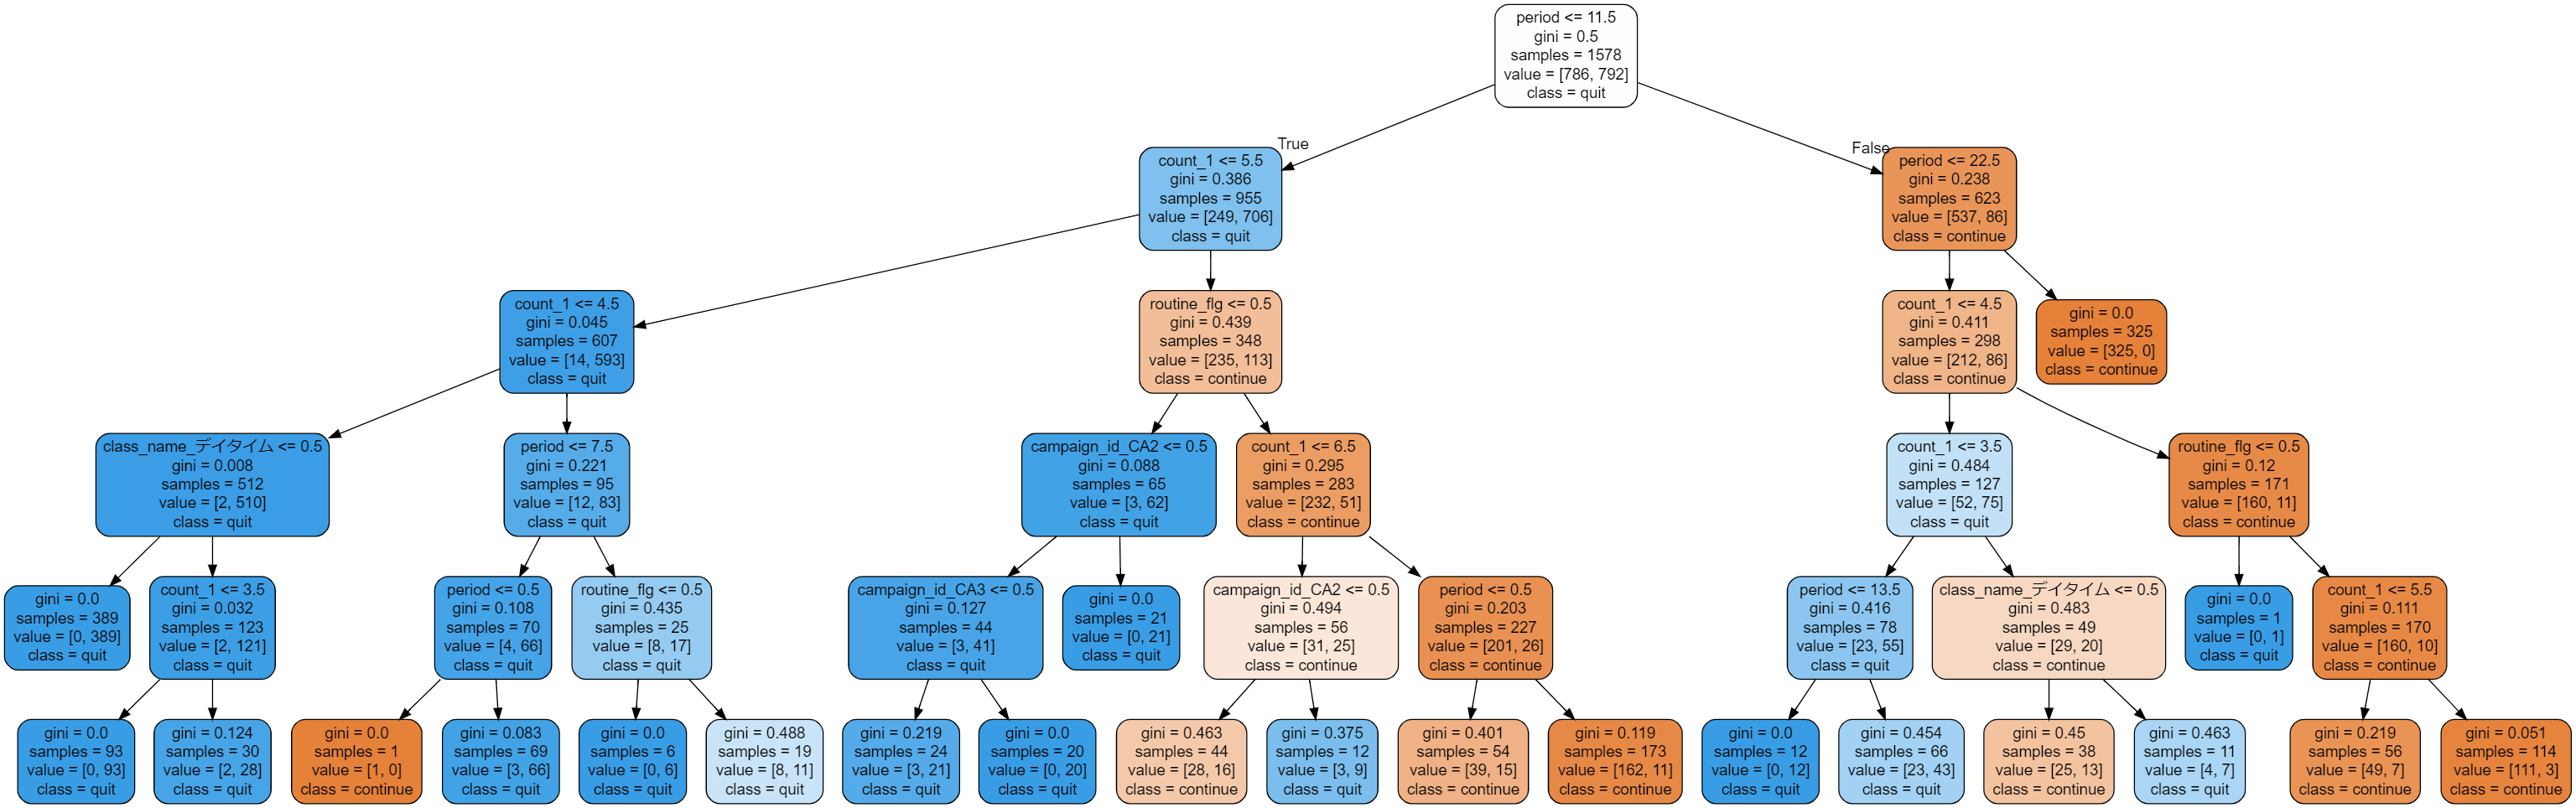

In [76]:
from IPython.display import Image, display_png
display_png(Image("./output/gym_dc_graphviz.png"))